## Sample Network 2 (Caribbean Food-chain) code


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import collections

import networkx as nx
import networkx.algorithms.community as nx_comm

In [2]:
A= np.array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], 
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], 
            [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], 
            [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 
            [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1], 
            [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], 
            [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], 
            [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
            [1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], 
            [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
            [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], 
            [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1], 
            [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], 
            [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], 
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1], 
            [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], 
            [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
            [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], 
            [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], 
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
            [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
            [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
            [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]])
print(A)


[[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [3]:
G = nx.Graph(A, nodetype=int)
G.edges()

EdgeView([(0, 3), (0, 9), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (1, 10), (1, 13), (1, 17), (1, 22), (1, 30), (1, 31), (1, 38), (1, 39), (2, 10), (2, 13), (2, 15), (2, 32), (2, 37), (2, 39), (3, 9), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 27), (3, 29), (3, 30), (3, 31), (3, 32), (3, 39), (3, 42), (3, 43), (4, 9), (4, 14), (4, 22), (4, 27), (4, 36), (4, 37), (4, 38), (5, 10), (5, 13), (5, 14), (5, 15), (5, 22), (5, 29), (5, 30), (5, 31), (5, 32), (5, 37), (6, 10), (6, 13), (6, 14), (6, 15), (6, 17), (6, 22), (6, 29), (6, 30), (6, 31), (6, 32), (6, 37), (7, 12), (7, 14), (7, 29), (7, 30), (7, 37), (7, 39), (8, 15), (8, 19), (8, 22), (8, 29), (8, 30), (8, 31), (8, 32), (8, 38), (8, 39), (9, 12), (9, 16), (9, 17), (9, 18), (9, 

In [4]:
G = nx.Graph(A, nodetype=int)
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43))

In [5]:
print(nx.info(G))

Graph with 44 nodes and 218 edges


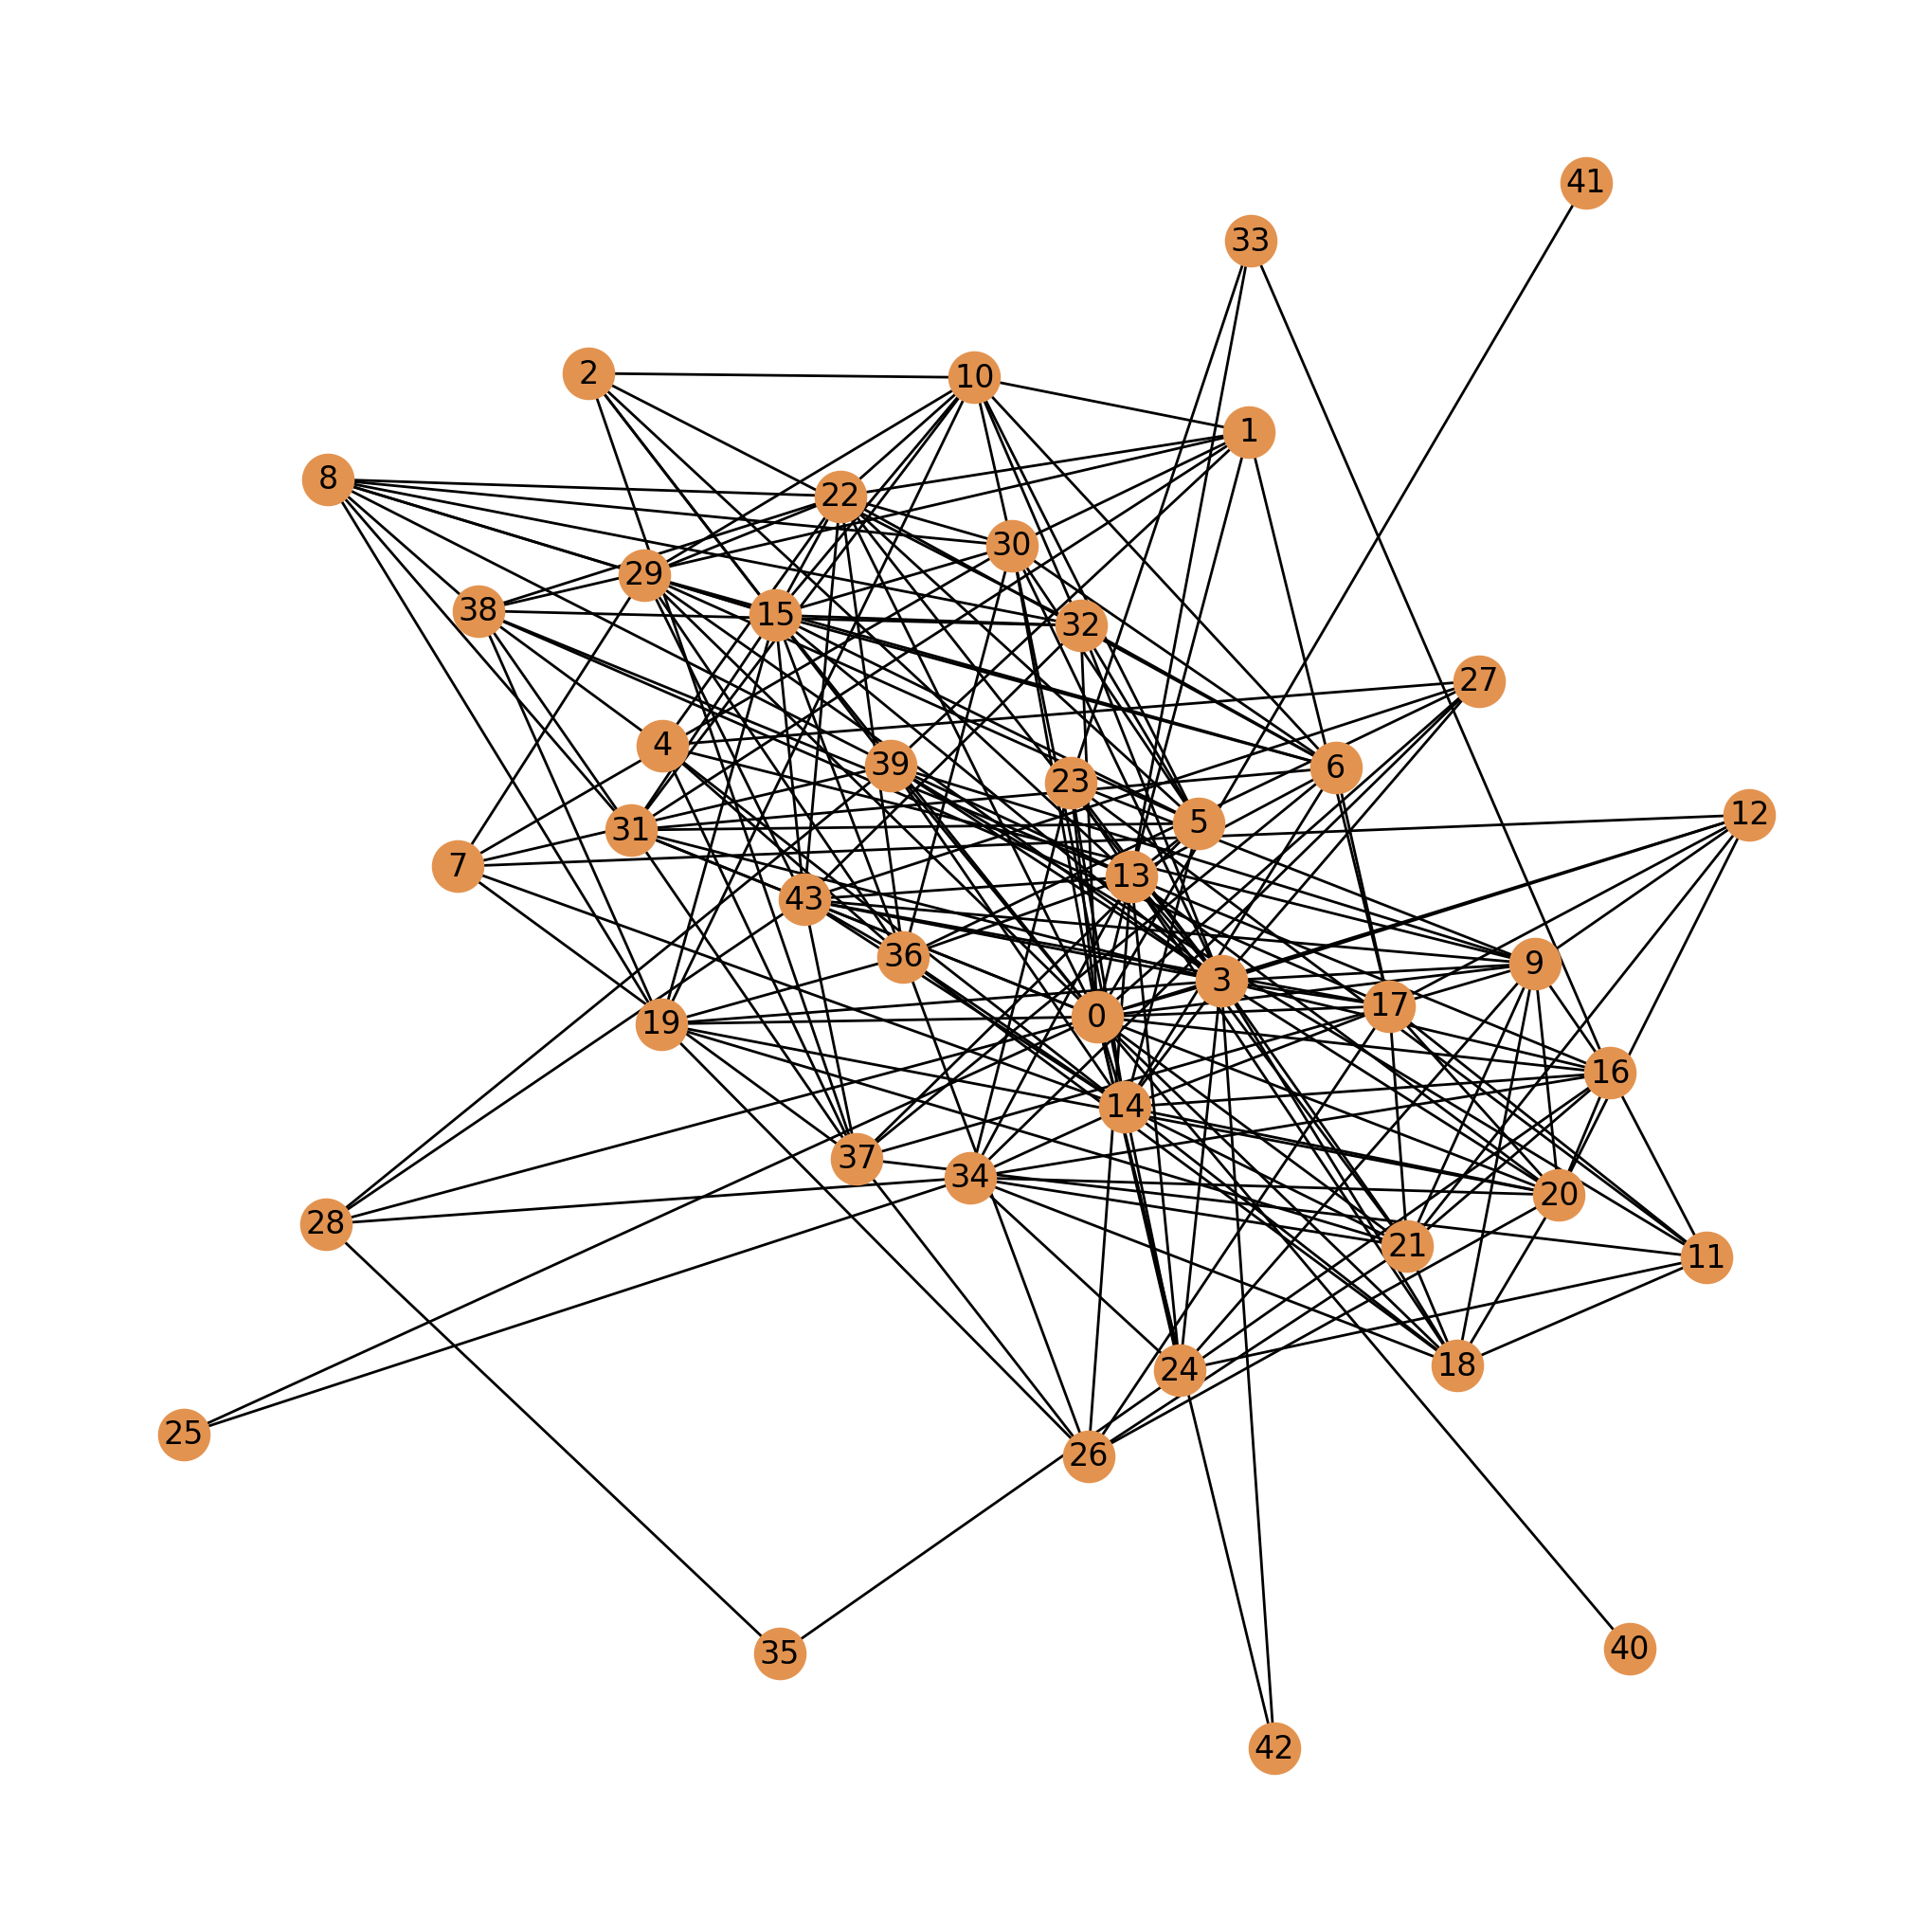

In [6]:
fig = plt.figure(figsize=(10, 10), dpi=200)

# Compute the positions of the nodes
pos = nx.spring_layout(G, k=1)

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=100, linewidths=10, node_color="#E39350")

# Remove axis and adjust margins
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)

# Save the plot to a file
plt.savefig("caribbeanfood_graph.png", dpi=300)
plt.show()

In [7]:
dict(G.degree())

{0: 27,
 1: 8,
 2: 6,
 3: 23,
 4: 7,
 5: 10,
 6: 11,
 7: 6,
 8: 9,
 9: 13,
 10: 11,
 11: 7,
 12: 7,
 13: 19,
 14: 18,
 15: 15,
 16: 11,
 17: 14,
 18: 10,
 19: 10,
 20: 12,
 21: 12,
 22: 14,
 23: 8,
 24: 7,
 25: 2,
 26: 7,
 27: 6,
 28: 5,
 29: 11,
 30: 12,
 31: 11,
 32: 10,
 33: 3,
 34: 11,
 35: 2,
 36: 12,
 37: 10,
 38: 9,
 39: 11,
 40: 1,
 41: 1,
 42: 2,
 43: 15}

In [8]:
dict(nx.betweenness_centrality(G))

{0: 0.23002145192981305,
 1: 0.0066491868841524575,
 2: 0.004954614553054535,
 3: 0.08496012671898615,
 4: 0.007336579212647419,
 5: 0.008521901326080631,
 6: 0.011111754848814888,
 7: 0.004623833197669203,
 8: 0.006276437106761147,
 9: 0.016306531025832505,
 10: 0.009097804496475594,
 11: 0.009194774116300063,
 12: 0.0038612311509671183,
 13: 0.09527713941125605,
 14: 0.054859276842293414,
 15: 0.019664816510556946,
 16: 0.04557206166923019,
 17: 0.03340761759583021,
 18: 0.008612829842647985,
 19: 0.019016473684048532,
 20: 0.012373336169005936,
 21: 0.012373336169005936,
 22: 0.022577844859748716,
 23: 0.011933253019588086,
 24: 0.004245690182523589,
 25: 0.0005254726184958743,
 26: 0.004848590723211552,
 27: 0.005316313123622093,
 28: 0.01611579435499701,
 29: 0.014283209343406544,
 30: 0.018163782300787787,
 31: 0.016634063073052867,
 32: 0.012823712294263552,
 33: 0.0002491694352159468,
 34: 0.02065582728941708,
 35: 0.0004921865386981665,
 36: 0.01962333619960087,
 37: 0.0235174

In [9]:
dict(nx.closeness_centrality(G))

{0: 0.7288135593220338,
 1: 0.5119047619047619,
 2: 0.4942528735632184,
 3: 0.6825396825396826,
 4: 0.5,
 5: 0.5058823529411764,
 6: 0.524390243902439,
 7: 0.4777777777777778,
 8: 0.4777777777777778,
 9: 0.5733333333333334,
 10: 0.4673913043478261,
 11: 0.4725274725274725,
 12: 0.5,
 13: 0.6417910447761194,
 14: 0.6323529411764706,
 15: 0.5733333333333334,
 16: 0.5584415584415584,
 17: 0.581081081081081,
 18: 0.5443037974683544,
 19: 0.5375,
 20: 0.581081081081081,
 21: 0.581081081081081,
 22: 0.5657894736842105,
 23: 0.5308641975308642,
 24: 0.524390243902439,
 25: 0.43434343434343436,
 26: 0.5,
 27: 0.4777777777777778,
 28: 0.48863636363636365,
 29: 0.5443037974683544,
 30: 0.5584415584415584,
 31: 0.5512820512820513,
 32: 0.524390243902439,
 33: 0.4174757281553398,
 34: 0.5,
 35: 0.37719298245614036,
 36: 0.5375,
 37: 0.5180722891566265,
 38: 0.5119047619047619,
 39: 0.5733333333333334,
 40: 0.42574257425742573,
 41: 0.42574257425742573,
 42: 0.43,
 43: 0.6056338028169014}

In [10]:
print(nx.average_shortest_path_length(G))

1.9312896405919662


In [11]:
print(nx.average_clustering(G))

0.3272018835596462


In [12]:
print(nx.transitivity(G))

0.3250194855806703


In [13]:
print(nx.degree_assortativity_coefficient(G))

-0.15302924383899172


In [14]:
dict(nx.clustering(G))

{0: 0.2222222222222222,
 1: 0.32142857142857145,
 2: 0.26666666666666666,
 3: 0.30039525691699603,
 4: 0.19047619047619047,
 5: 0.3333333333333333,
 6: 0.3090909090909091,
 7: 0.13333333333333333,
 8: 0.3333333333333333,
 9: 0.3974358974358974,
 10: 0.45454545454545453,
 11: 0.047619047619047616,
 12: 0.6666666666666666,
 13: 0.21637426900584794,
 14: 0.28104575163398693,
 15: 0.49523809523809526,
 16: 0.4,
 17: 0.32967032967032966,
 18: 0.5111111111111111,
 19: 0.3111111111111111,
 20: 0.5151515151515151,
 21: 0.5151515151515151,
 22: 0.4065934065934066,
 23: 0.35714285714285715,
 24: 0.42857142857142855,
 25: 0,
 26: 0.42857142857142855,
 27: 0.3333333333333333,
 28: 0.2,
 29: 0.41818181818181815,
 30: 0.3939393939393939,
 31: 0.32727272727272727,
 32: 0.3333333333333333,
 33: 0.6666666666666666,
 34: 0.2909090909090909,
 35: 0,
 36: 0.30303030303030304,
 37: 0.15555555555555556,
 38: 0.25,
 39: 0.2,
 40: 0,
 41: 0,
 42: 1.0,
 43: 0.3523809523809524}

In [15]:
dict(nx.subgraph_centrality(G))

{0: 28310.097711502738,
 1: 3065.182978267462,
 2: 1612.339344616523,
 3: 26345.47973425449,
 4: 2051.5678054878454,
 5: 5263.67792483124,
 6: 6475.9606260571,
 7: 1525.046180859872,
 8: 3566.274075559366,
 9: 9347.130232592068,
 10: 4785.3403193998165,
 11: 1735.92051145947,
 12: 3664.708538053983,
 13: 14893.243737422177,
 14: 15901.405727628106,
 15: 11750.527935226477,
 16: 6466.045038965176,
 17: 10048.563628058031,
 18: 7155.230535325734,
 19: 5718.329945527809,
 20: 9098.717318648207,
 21: 9098.717318648207,
 22: 10006.404375273607,
 23: 4144.6027621006215,
 24: 3926.1411688308262,
 25: 355.068299788922,
 26: 2495.710597634138,
 27: 2624.741538071435,
 28: 1208.3895074393422,
 29: 7155.666200096388,
 30: 8067.040977023924,
 31: 6397.499759386316,
 32: 5555.022375590596,
 33: 459.49917416926326,
 34: 4482.042700038324,
 35: 87.56062461601185,
 36: 7046.108389600673,
 37: 2813.781594608868,
 38: 3239.7961824709278,
 39: 5688.954362211262,
 40: 181.9237131726147,
 41: 181.923713172

In [16]:
dict(nx.eigenvector_centrality(G))

{0: 0.3197509913031934,
 1: 0.10492421521737356,
 2: 0.07599643271186751,
 3: 0.3084765987134944,
 4: 0.08597651243004399,
 5: 0.13726385320206094,
 6: 0.15245682900214408,
 7: 0.07410640120511444,
 8: 0.11273259429426366,
 9: 0.18325902437097805,
 10: 0.1302502715366159,
 11: 0.07880588239405892,
 12: 0.11471921541418216,
 13: 0.2318158442403825,
 14: 0.23954162126432568,
 15: 0.20522085105763593,
 16: 0.1522222774061491,
 17: 0.19038219202996884,
 18: 0.16033179064374925,
 19: 0.14364679785074264,
 20: 0.18078352780455603,
 21: 0.18078352780455603,
 22: 0.1894377533097094,
 23: 0.12197936560546742,
 24: 0.11875686954430417,
 25: 0.03561087365859063,
 26: 0.09475662469704561,
 27: 0.09728540756530714,
 28: 0.06590842856408667,
 29: 0.16025097456442708,
 30: 0.17026524345226715,
 31: 0.1515048883372857,
 32: 0.1411705714375967,
 33: 0.04038133453499899,
 34: 0.1264881122705939,
 35: 0.017407289840144894,
 36: 0.15940691723740366,
 37: 0.100569810807585,
 38: 0.10786120337582837,
 39: 0

In [17]:
dict(nx.katz_centrality(G, alpha=0.01))

{0: 0.17605914638103803,
 1: 0.14756045369883275,
 2: 0.1444648345631246,
 3: 0.17056092516773672,
 4: 0.1459141519622087,
 5: 0.15072742957452478,
 6: 0.15229617033840162,
 7: 0.14436745597742956,
 8: 0.14895560597892538,
 9: 0.15531151933005527,
 10: 0.15189459414993395,
 11: 0.14575749341224029,
 12: 0.14630036910878455,
 13: 0.16417326083106434,
 14: 0.1629159971341377,
 15: 0.15843255197539494,
 16: 0.15231392258215587,
 17: 0.15687415027479304,
 18: 0.15107068103705903,
 19: 0.15081370929742327,
 20: 0.1540300061949435,
 21: 0.1540300061949435,
 22: 0.15688798504249182,
 23: 0.1478519164487567,
 24: 0.14645360228955298,
 25: 0.13846641438185195,
 26: 0.14602535318398843,
 27: 0.1447543509691964,
 28: 0.14295671725981593,
 29: 0.15241304225722554,
 30: 0.15393109810333633,
 31: 0.15233054653518863,
 32: 0.15079796763006606,
 33: 0.13983143163755227,
 34: 0.1517782052036366,
 35: 0.1381407481548491,
 36: 0.15364806483612972,
 37: 0.15016232173449465,
 38: 0.148931115664442,
 39: 0.

In [18]:
dict(nx.eccentricity(G))

{0: 2,
 1: 3,
 2: 3,
 3: 2,
 4: 3,
 5: 3,
 6: 3,
 7: 3,
 8: 3,
 9: 3,
 10: 4,
 11: 3,
 12: 3,
 13: 2,
 14: 2,
 15: 3,
 16: 3,
 17: 3,
 18: 3,
 19: 3,
 20: 2,
 21: 2,
 22: 3,
 23: 3,
 24: 3,
 25: 3,
 26: 3,
 27: 3,
 28: 3,
 29: 3,
 30: 3,
 31: 3,
 32: 3,
 33: 3,
 34: 3,
 35: 4,
 36: 3,
 37: 3,
 38: 3,
 39: 2,
 40: 3,
 41: 3,
 42: 3,
 43: 2}

In [19]:
print(nx.radius(G))

2


In [20]:
print(nx.diameter(G))

4


In [21]:
dict(nx.triangles(G))

{0: 78,
 1: 9,
 2: 4,
 3: 76,
 4: 4,
 5: 15,
 6: 17,
 7: 2,
 8: 12,
 9: 31,
 10: 25,
 11: 1,
 12: 14,
 13: 37,
 14: 43,
 15: 52,
 16: 22,
 17: 30,
 18: 23,
 19: 14,
 20: 34,
 21: 34,
 22: 37,
 23: 10,
 24: 9,
 25: 0,
 26: 9,
 27: 5,
 28: 2,
 29: 23,
 30: 26,
 31: 18,
 32: 15,
 33: 2,
 34: 16,
 35: 0,
 36: 20,
 37: 7,
 38: 9,
 39: 11,
 40: 0,
 41: 0,
 42: 1,
 43: 37}

In [22]:
def edge_to_remove(graph):
 G_dict = nx.edge_betweenness_centrality(graph)
 edge = ()

 # extract the edge with highest edge betweenness centrality score
 for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
     edge = key
     break

 return edge

In [23]:
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

In [24]:

# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))
node_groups


[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  41,
  42,
  43],
 [40]]

In [25]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('#E39350')
    else: 
        color_map.append('#A373DF')  


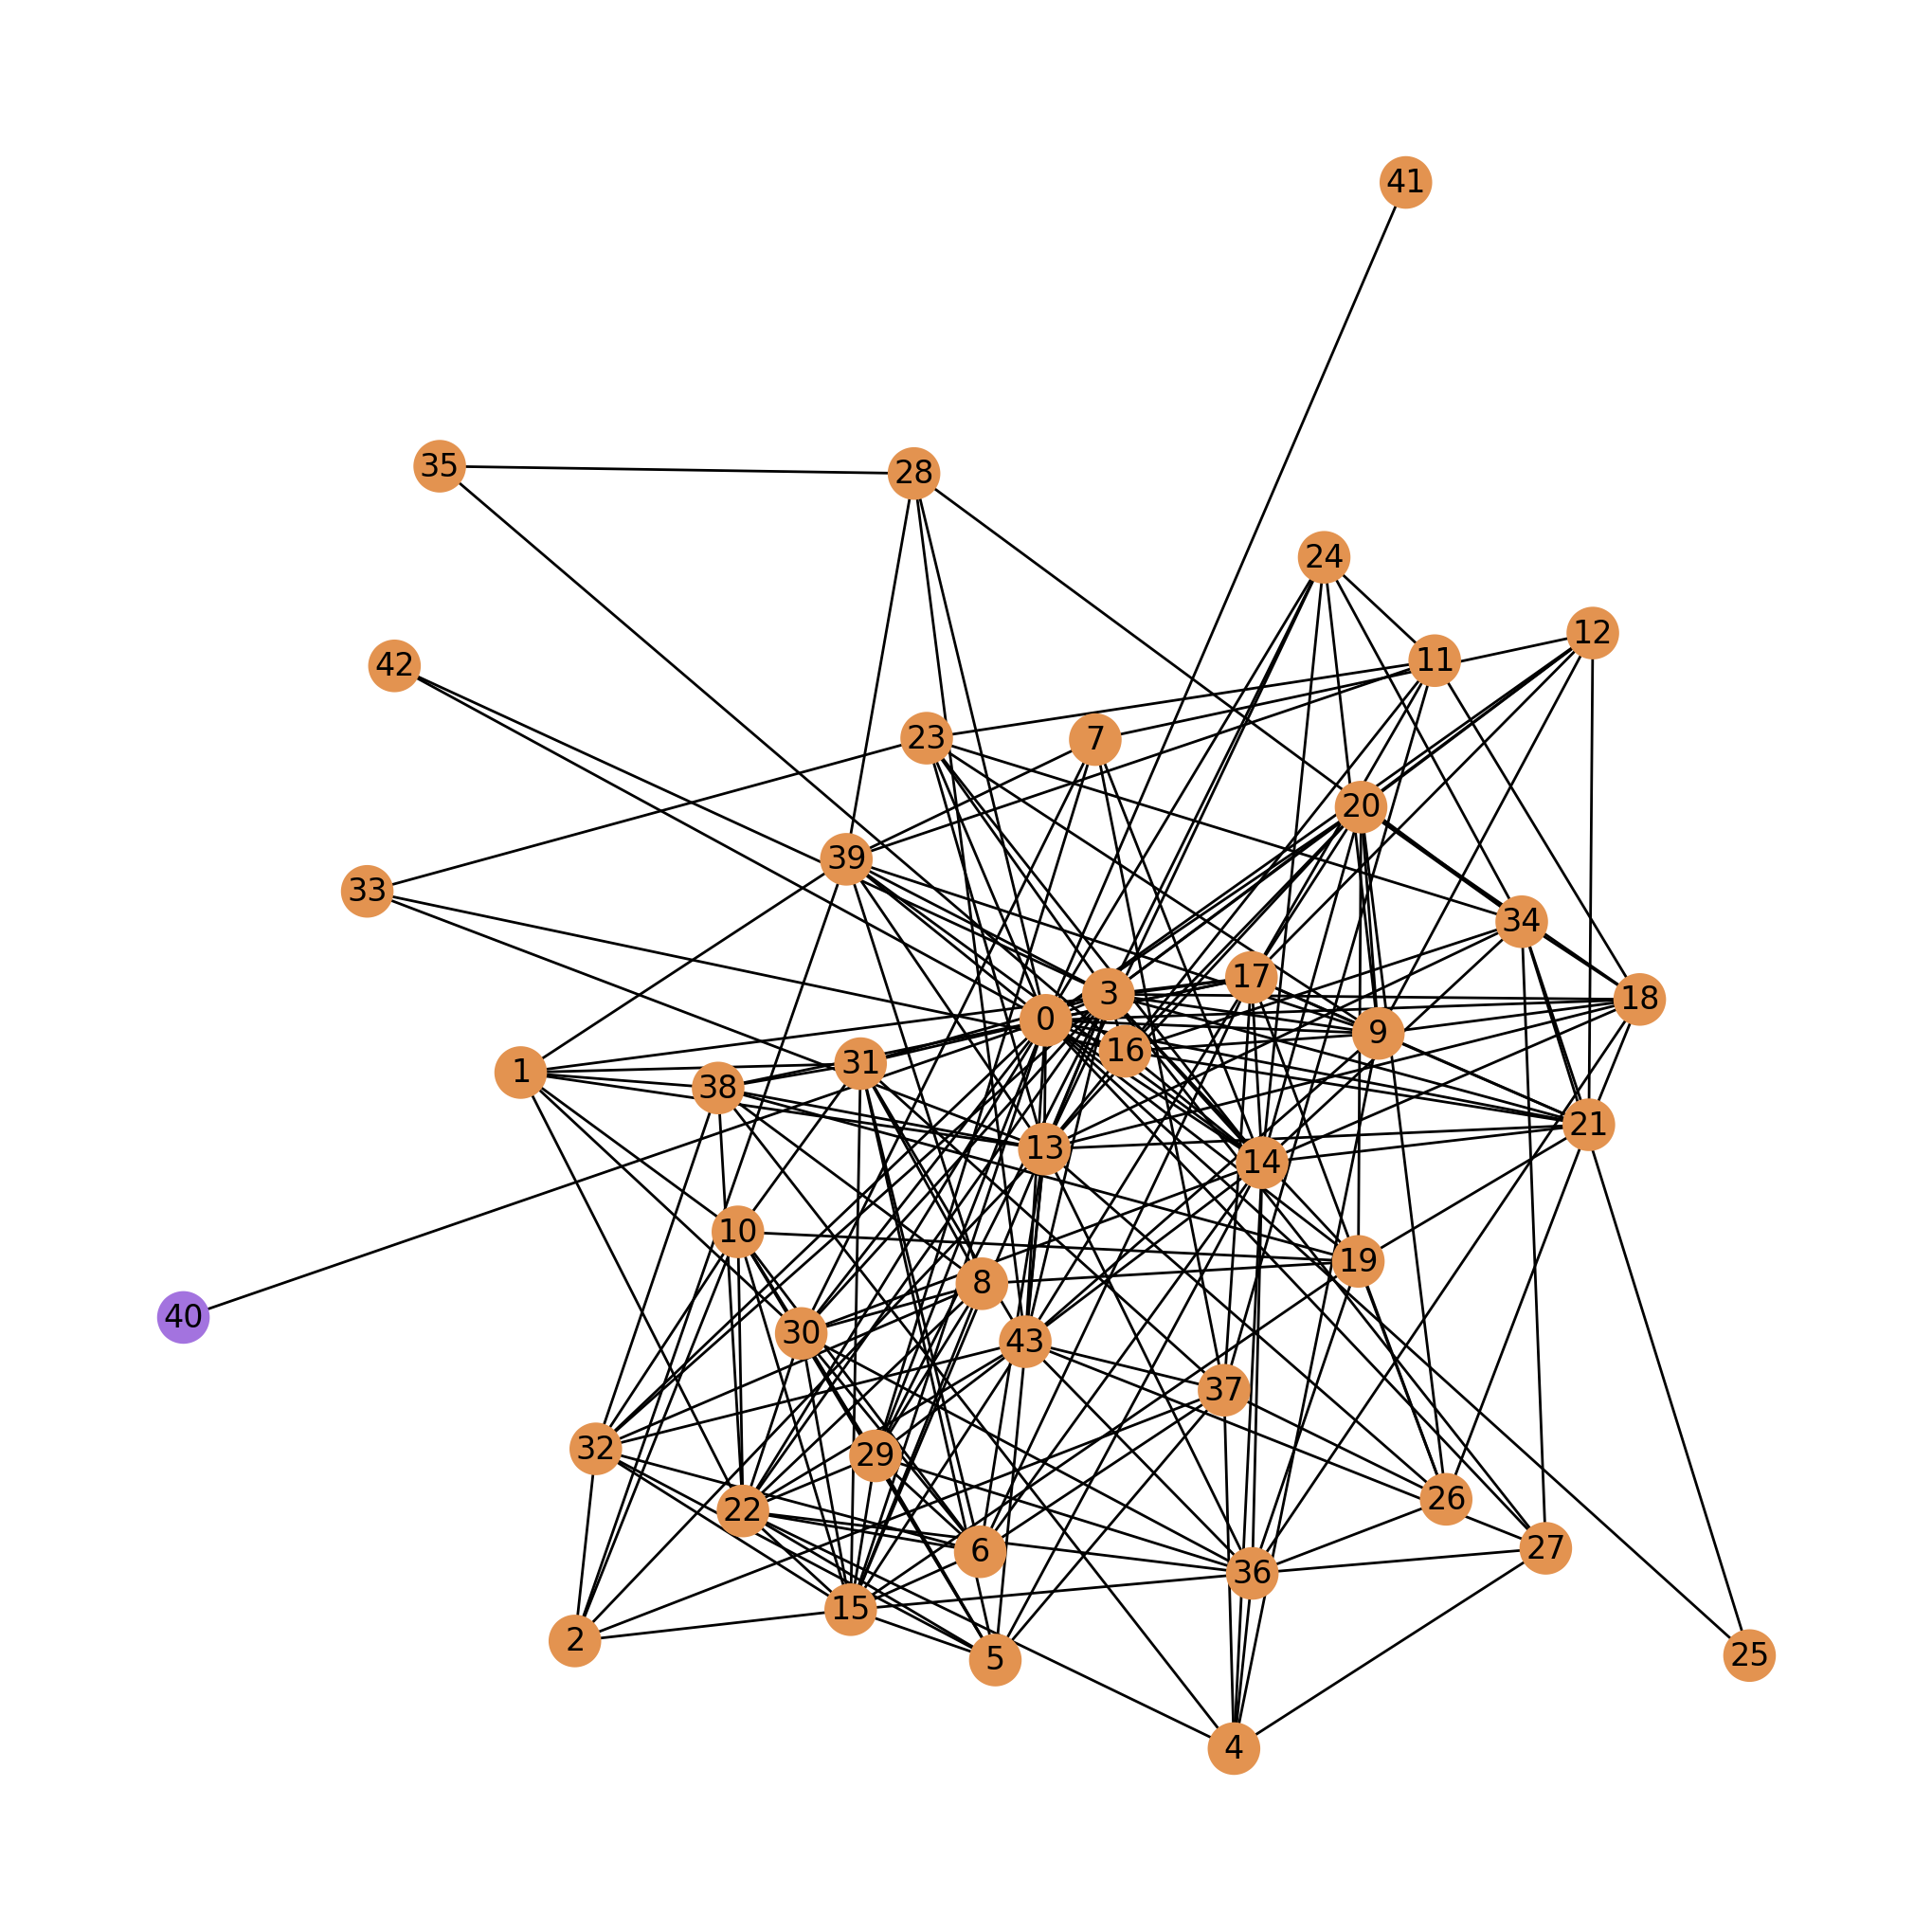

In [26]:
fig = plt.figure(figsize=(10, 10), dpi=200)

# Compute the positions of the nodes
pos = nx.spring_layout(G, k=1)

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=100, linewidths=10, node_color=color_map)

# Remove axis and adjust margins
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)

# Save the plot to a file
plt.savefig("caribbean_communities_graph.png", dpi=300)
plt.show()

In [27]:
print(nx_comm.modularity(G, [{0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,43},{40}]))

-1.0520999915886843e-05


In [28]:
# Find the eigenvalues and eigenvectors of the adjacency matrix
eigenvalues, eigenvectors = np.linalg.eig(A)

# Save the eigenvalues and eigenvectors to CSV files
pd.DataFrame(eigenvalues.real, columns=['eigenvalue']).to_csv('eigenvalues.csv', index=False, float_format='%.6f')
pd.DataFrame(eigenvectors.real, columns=[f'eigenvector_{i+1}' for i in range(len(eigenvectors))]).to_csv('eigenvectors.csv', index=False, float_format='%.6f')

In [29]:
distance_matrix = np.where(A==1, 1, np.inf)

for k in range(distance_matrix.shape[0]):
    np.minimum(distance_matrix, distance_matrix[k,:] + distance_matrix[:,k].reshape(-1,1), out=distance_matrix)

np.savetxt('distance_matrix.csv', distance_matrix, delimiter=',', fmt='%d')

In [30]:
# Calculate the incidence of the edges on the nodes
inc_mtx = nx.incidence_matrix(G)
print(inc_mtx.todense())

pd.DataFrame(inc_mtx.todense()).to_csv('incidence_matrix.csv') #incidence matrix

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


In [31]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

# Convert the adjacency matrix to a CSR sparse matrix
sparse_matrix = csr_matrix(A)

# Find the connected components in the network
num_partitions, partitions = connected_components(sparse_matrix)

# Print the number of partitions
print(f'The network has {num_partitions} partition(s).')

The network has 1 partition(s).


In [32]:
# Find the number of cliques, spectral radius, and eigenvalue spacing for the adjacency matrix and save them to a CSV file
cliques = list(nx.find_cliques(G))
spectral_radius = max(abs(np.linalg.eigvals(A)))
eigenvalues = sorted(abs(np.linalg.eigvals(A)))
eigenvalue_spacing = min([eigenvalues[i+1]-eigenvalues[i] for i in range(len(eigenvalues)-1)])
pd.DataFrame({'num_cliques': [len(cliques)], 'spectral_radius': [spectral_radius], 'eigenvalue_spacing': [eigenvalue_spacing]}).to_csv('clique_spectral_eigenvalue.csv', index=False)


In [33]:
# Calculate the degree matrix
degree_matrix = np.diag(np.sum(A, axis=1))

# Calculate the laplacian matrix
laplacian_matrix = degree_matrix + A

# Save the laplacian matrix to CSV file
np.savetxt('laplacian_matrix.csv', laplacian_matrix, delimiter=',', fmt='%d')

In [34]:
# Find the eigenvalues and eigenvectors of the adjacency matrix
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)

# Save the eigenvalues and eigenvectors to CSV files
pd.DataFrame(eigenvalues.real, columns=['eigenvalue']).to_csv('eigenvalues_laplacian_matrix.csv', index=False, float_format='%.6f')
pd.DataFrame(eigenvectors.real, columns=[f'eigenvector_{i+1}' for i in range(len(eigenvectors))]).to_csv('eigenvectors_laplacian_matrix.csv', index=False, float_format='%.6f')

___Random Graph (Caribbean Food-chain)code___

In [35]:
n = 44 
m = 218  

H = nx.gnm_random_graph(n, m)
H.edges()

EdgeView([(0, 39), (0, 7), (0, 17), (0, 27), (0, 5), (0, 12), (0, 42), (0, 9), (0, 40), (0, 19), (0, 6), (0, 33), (0, 34), (0, 4), (1, 39), (1, 23), (1, 32), (1, 4), (1, 34), (1, 43), (1, 18), (1, 22), (1, 28), (1, 24), (2, 30), (2, 43), (2, 34), (2, 32), (2, 27), (2, 40), (2, 10), (2, 18), (2, 14), (2, 11), (2, 4), (2, 31), (3, 22), (3, 35), (3, 6), (3, 34), (3, 13), (3, 37), (3, 24), (3, 36), (3, 30), (3, 16), (4, 22), (4, 40), (4, 7), (4, 28), (5, 40), (5, 36), (5, 35), (5, 39), (5, 37), (6, 27), (6, 19), (6, 35), (6, 9), (6, 28), (6, 17), (6, 21), (6, 26), (6, 40), (6, 33), (6, 42), (6, 31), (6, 12), (6, 24), (6, 25), (7, 24), (7, 31), (7, 34), (7, 42), (7, 28), (7, 23), (7, 38), (7, 18), (7, 32), (7, 12), (8, 9), (8, 43), (8, 41), (8, 23), (8, 17), (8, 30), (8, 14), (8, 37), (8, 29), (8, 26), (8, 16), (9, 16), (9, 24), (9, 26), (9, 19), (9, 30), (9, 15), (9, 33), (10, 21), (10, 35), (10, 12), (10, 11), (10, 19), (10, 16), (10, 25), (10, 30), (10, 17), (10, 43), (10, 31), (11, 33),

In [36]:
print(nx.info(H))

Graph with 44 nodes and 218 edges


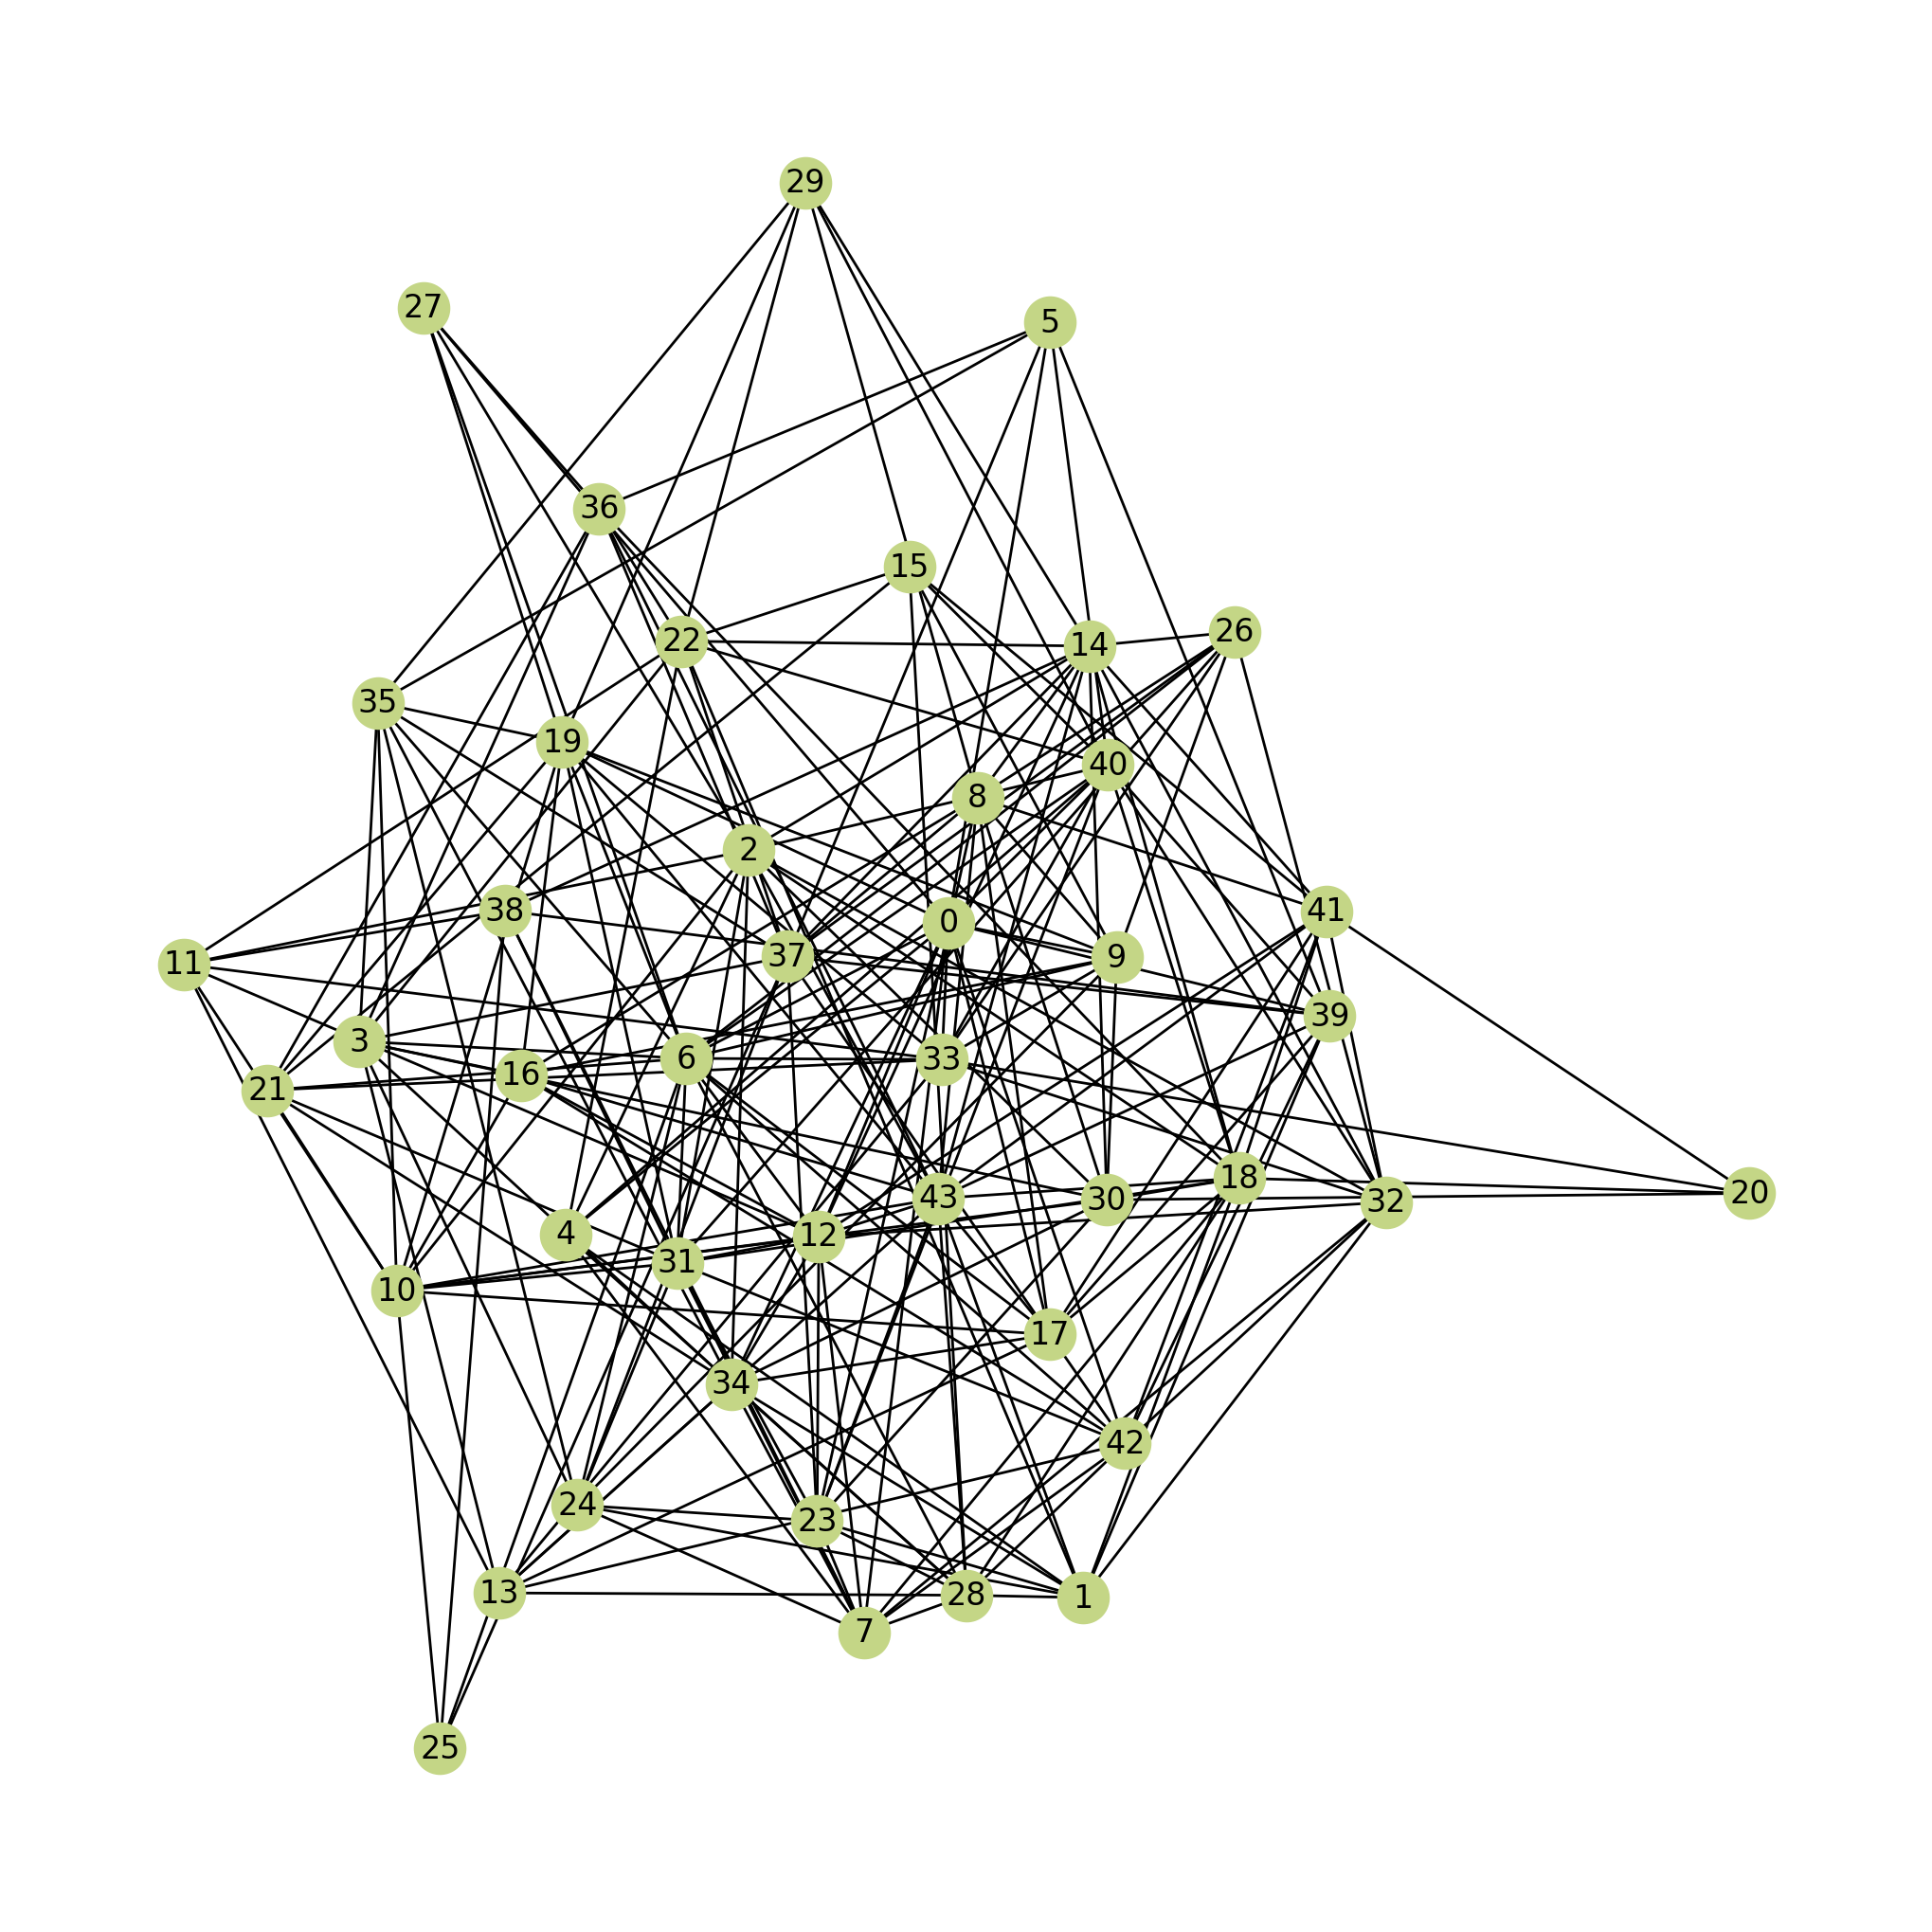

In [37]:
fig = plt.figure(figsize=(10, 10), dpi=200)

# Compute the positions of the nodes
pos = nx.spring_layout(H, k=1)

# Draw the nodes and edges
nx.draw(H, pos, with_labels=True, node_size=100, linewidths=10, node_color="#C4D686")

# Remove axis and adjust margins
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)

# Save the plot to a file
plt.savefig("Caribbean__random_graph.png", dpi=300)
plt.show()

In [38]:
H.degree()

DegreeView({0: 14, 1: 10, 2: 12, 3: 10, 4: 7, 5: 6, 6: 17, 7: 12, 8: 11, 9: 10, 10: 12, 11: 7, 12: 13, 13: 8, 14: 13, 15: 6, 16: 8, 17: 10, 18: 13, 19: 12, 20: 4, 21: 8, 22: 10, 23: 11, 24: 9, 25: 4, 26: 8, 27: 5, 28: 11, 29: 6, 30: 10, 31: 13, 32: 10, 33: 11, 34: 12, 35: 9, 36: 8, 37: 13, 38: 6, 39: 9, 40: 13, 41: 10, 42: 11, 43: 14})

In [39]:
print(nx.average_shortest_path_length(H))

1.8456659619450317


In [40]:
print(nx.average_clustering(H))

0.24282416929475747


In [41]:
print(nx.transitivity(H))

0.24729156853509185


In [42]:
print(nx.clustering(H))

{0: 0.2857142857142857, 1: 0.2222222222222222, 2: 0.22727272727272727, 3: 0.24444444444444444, 4: 0.3333333333333333, 5: 0.4, 6: 0.22058823529411764, 7: 0.30303030303030304, 8: 0.2909090909090909, 9: 0.28888888888888886, 10: 0.22727272727272727, 11: 0.14285714285714285, 12: 0.2564102564102564, 13: 0.21428571428571427, 14: 0.28205128205128205, 15: 0.06666666666666667, 16: 0.25, 17: 0.2, 18: 0.23076923076923078, 19: 0.3333333333333333, 20: 0.3333333333333333, 21: 0.25, 22: 0.2, 23: 0.2727272727272727, 24: 0.3333333333333333, 25: 0, 26: 0.35714285714285715, 27: 0.3, 28: 0.2909090909090909, 29: 0.26666666666666666, 30: 0.2222222222222222, 31: 0.2564102564102564, 32: 0.24444444444444444, 33: 0.2727272727272727, 34: 0.18181818181818182, 35: 0.2777777777777778, 36: 0.17857142857142858, 37: 0.20512820512820512, 38: 0.06666666666666667, 39: 0.2222222222222222, 40: 0.1794871794871795, 41: 0.28888888888888886, 42: 0.2, 43: 0.26373626373626374}
